<a href="https://colab.research.google.com/github/JaneOliveira/mini-curso-clustering-unimontes/blob/main/Clustering_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering**

*É uma forma de modelagem de dados que se baseia na construção de clusters (grupos). Clusters são conjuntos de dados que exibem a seguinte propriedade: os elementos pertencentes a um mesmo conjunto apresentam maior semelhança entre si que os elementos pertencentes a qualquer outro conjunto, com relação a um certo critério de similaridade.*



[Curso: Introdução ao clustering - Google](https://developers.google.com/machine-learning/clustering?hl=pt-br)



Algoritmo elaborado por Jane Oliveira para Minicurso de clustering apresentado no evento: Escola de Verão 2025 - Unimontes.


#K-means



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class KMeans:
    def __init__(self, k=3, max_iterations=100):
        """Inicialização da classe com os parâmetros padrões.
        Total de clusters (k), número máximo de iterações e centróides como None.
        """

        self.k = k
        self.max_iterations = max_iterations
        self.centroids = None

        #teste
        self.sse = 0  # Atributo para armazenar o SSE (soma quadratica dos erros)


    def initialize_centroids(self, data):
        """inicializaos centróides aleatoriamente.
        Escolhe k pontos aleatórios como centróides."""

        np.random.seed()
        random_idx = np.random.permutation(data.shape[0]) #bagunçando os indices de dados
        centroids = data[random_idx[:self.k]] #selecionando k dados como centroides
        return centroids

    def assgns_point_to_nearby_clusters(self, data):
        """Atribui cada ponto ao cluster do centróide mais próximo.
        Foi utilizado a distância euclidiana."""

        distances = np.sqrt(((data - self.centroids[:, np.newaxis])**2).sum(axis=2)) # Calcula a distância euclidiana de cada ponto a cada centróide
        return np.argmin(distances, axis=0)  # return índice do centróide mais próximo para cada ponto

    def update_centroids(self, data, clusters):
        """Atualiza os centróides como a média dos pontos no cluster"""

        new_centroids = np.array([data[clusters == k].mean(axis=0) for k in range(self.k)])
        return new_centroids

    def fit(self, data):
        """Ajusta o modelo aos dados.
        Itera reatribuindo clusters e atualizando centróides até que os centróides
        não mudem entre iterações ou até que o número máximo de iterações seja atingido."""

        self.centroids = self.initialize_centroids(data)
        for i in range(self.max_iterations):
            clusters = self.assgns_point_to_nearby_clusters(data)
            new_centroids = self.update_centroids(data, clusters)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

            #teste
            # Calcula o SSE depois de formar os clusters
            self.sse = np.sum((data - self.centroids[clusters])**2)

        return self.centroids, clusters

##Testando o algoritmo com uma base gerada aleatoariamente pela make_blobs, seguindo as regras que escolhi: quantidade de exemplos e quantidade de conjuntos.

In [ ]:
# Gerando um dataset teste com n_samples amostras de dados distribuídas em n centros (clusters)
data, labels = make_blobs(n_samples=1000, centers=4, cluster_std=0.7)

# instaciando o KMeans
kmeans = KMeans(k=4, max_iterations=300)

# Ajuste do modelo
centroids, clusters = kmeans.fit(data)

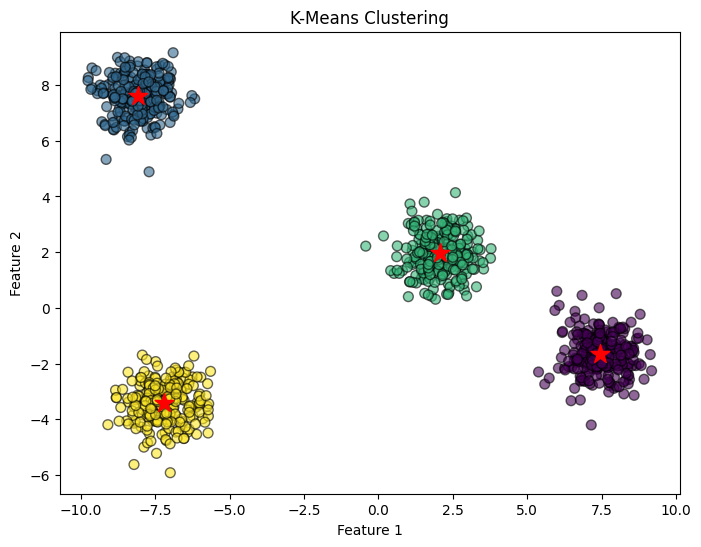

In [ ]:
# Plot dos resultados
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='*')  # mark centroids
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#Testando o método Elbow onde se calcula a soma dos quadrados dos erros (SSE) para diferentes valores de k. E plotamos o gráfico para análise.

Quando a gente não sabe quantos clusters nossas amostras podem formar, nós precisamos utilizar uma forma de validar o que encontramos no lugar de um chutômetro.

A ideia é rodar o KMeans para vários quantidades diferentes de clusters e dizer qual dessas quantidades é o número ótimo de clusters.



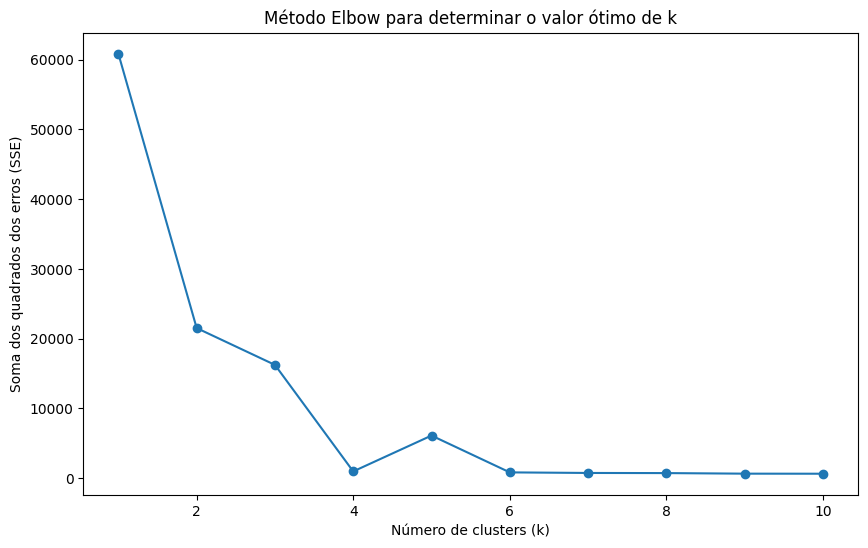

In [ ]:
sse = []
ks = range(1, 11)
for k in ks:
    kmeans = KMeans(k=k, max_iterations=300)
    kmeans.fit(data)
    sse.append(kmeans.sse)

# Plotar o método Elbow
plt.figure(figsize=(10, 6))
plt.plot(ks, sse, marker='o')
plt.title('Método Elbow para determinar o valor ótimo de k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Soma dos quadrados dos erros (SSE)')
plt.show()

testando k-means na base da iris

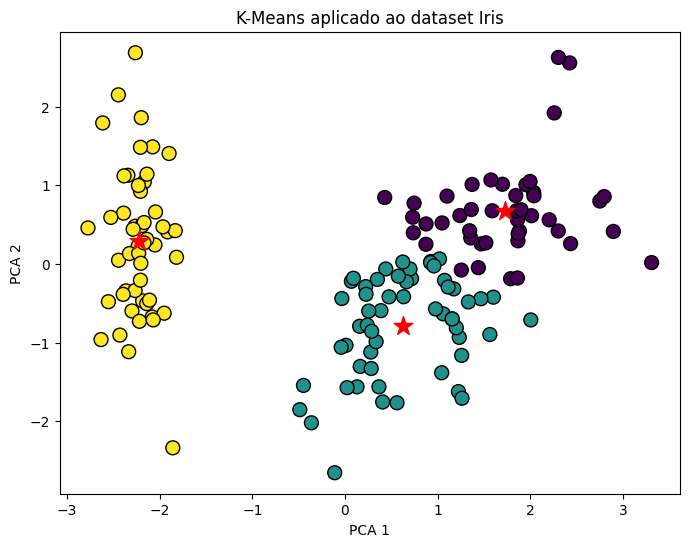

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
df = iris.data  # Apenas as features


scaler = StandardScaler()
df = scaler.fit_transform(df)


kmeans = KMeans(k=3, max_iterations=300)
centroids, clusters = kmeans.fit(df)

# Usando PCA para reduzir a dimensionalidade dos dados para 2D e assim, conseguirmos visualizar a clusterização
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Plotando os resultados dos clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], c='red', s=200, marker='*')  # Centróides
plt.title('K-Means aplicado ao dataset Iris')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

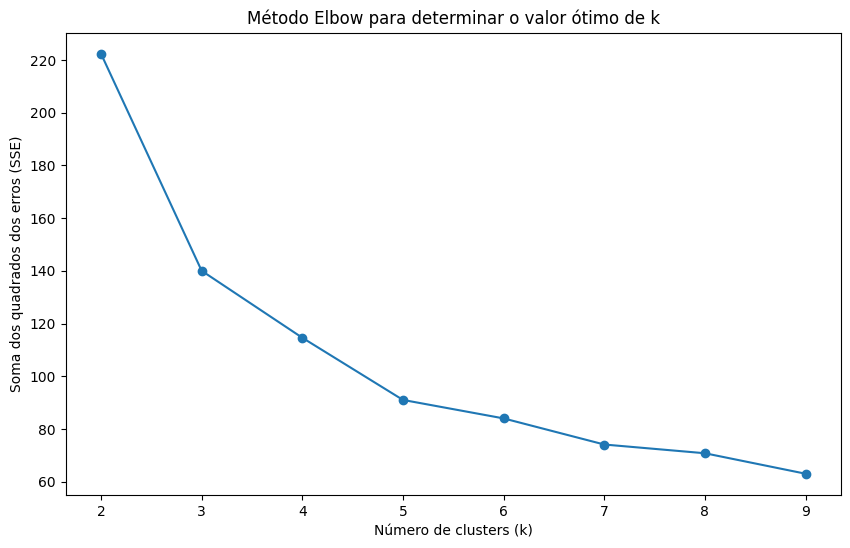

In [ ]:
sse = []
ks = range(2, 10)
for k in ks:
    kmeans = KMeans(k=k, max_iterations=300)
    kmeans.fit(df)
    sse.append(kmeans.sse)

# Plotar o método Elbow
plt.figure(figsize=(10, 6))
plt.plot(ks, sse, marker='o')
plt.title('Método Elbow para determinar o valor ótimo de k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Soma dos quadrados dos erros (SSE)')
plt.show()